In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(n_samples=2500, n_classes=2, n_features=100, n_informative=75, n_redundant=25, n_clusters_per_class=1, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y, test_size=0.3)
print(X_train.shape, X_test.shape)

(1750, 100) (750, 100)


In [4]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=500)
log_model.fit(X_train, y_train);

LogisticRegression
Accuracy:          0.9626666666666667
Balanced Accuracy: 0.9626666666666667


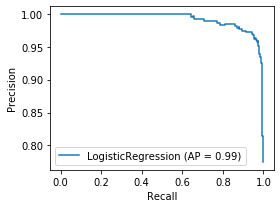

In [5]:
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import accuracy_score, balanced_accuracy_score

y_pred = log_model.predict(X_test)
print("LogisticRegression")
print("Accuracy:          %s" % accuracy_score(y_test, y_pred))
print("Balanced Accuracy: %s" % balanced_accuracy_score(y_test, y_pred))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 3))
plot_precision_recall_curve(log_model, X_test, y_test, ax=ax);
plt.tight_layout()
fig.savefig("images/LR-PRCurve.png")

In [6]:
from algorithms import SimpleESClassifier
from objectives import CrossEntropyObjective

es_model = SimpleESClassifier(objective=CrossEntropyObjective(), n_iter=500, random_state=0)
es_model.fit(X_train, y_train);

100%|██████████| 500/500 [00:23<00:00, 21.36it/s]


In [7]:
def plot_model(model, iterations, X, y):
    name = type(model).__name__

    y_pred = model.predict(X_test)
    print(name)
    print("Accuracy:          %s" % accuracy_score(y_test, y_pred))
    print("Balanced Accuracy: %s" % balanced_accuracy_score(y_test, y_pred))
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
    axes[0].set_title(name + " Score")
    axes[0].set_xlabel("Iteration")
    axes[0].set_ylabel("Accuracy")
    axes[0].set_title("Score")
    axes[0].set_ylim([0, 1])
    axes[0].plot(range(iterations), model.history_)
    axes[1].set_title("PR Curve")
    plot_precision_recall_curve(model, X, y, ax=axes[1]);
    plt.tight_layout()
    fig.savefig("images/" + name + "-PRCurve.png")

SimpleESClassifier
Accuracy:          0.9066666666666666
Balanced Accuracy: 0.9066666666666666


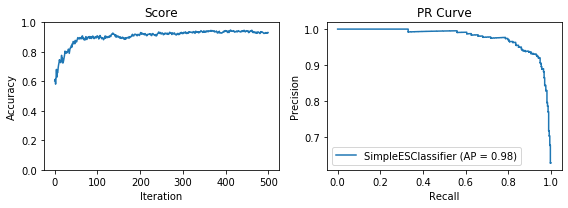

In [8]:
plot_model(es_model, 500, X_test, y_test)

In [9]:
from algorithms import GeneticESClassifier

es_model = GeneticESClassifier(objective=CrossEntropyObjective(), n_iter=500, random_state=0)
es_model.fit(X_train, y_train);

100%|██████████| 500/500 [00:25<00:00, 19.61it/s]


GeneticESClassifier
Accuracy:          0.952
Balanced Accuracy: 0.952


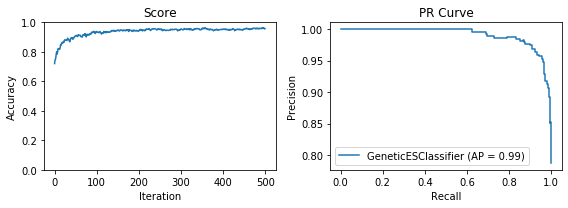

In [10]:
plot_model(es_model, 500, X_test, y_test)

In [11]:
from algorithms import NaturalESClassifier

es_model = NaturalESClassifier(objective=CrossEntropyObjective(), n_iter=500, random_state=0)
es_model.fit(X_train, y_train);

100%|██████████| 500/500 [00:21<00:00, 23.74it/s]


NaturalESClassifier
Accuracy:          0.9533333333333334
Balanced Accuracy: 0.9533333333333334


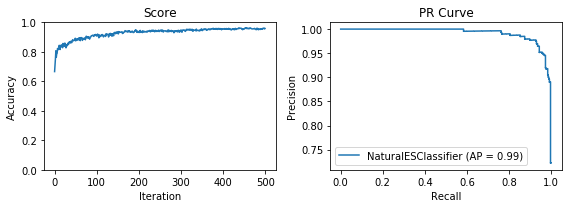

In [12]:
plot_model(es_model, 500, X_test, y_test)

In [13]:
from algorithms import DifferentialEvolutionClassifier

de_model = DifferentialEvolutionClassifier(objective=CrossEntropyObjective(), n_iter=2500, random_state=0, bounds=(-15, 15))
de_model.fit(X_train, y_train);

100%|██████████| 2500/2500 [00:25<00:00, 96.25it/s]


DifferentialEvolutionClassifier
Accuracy:          0.924
Balanced Accuracy: 0.9239999999999999


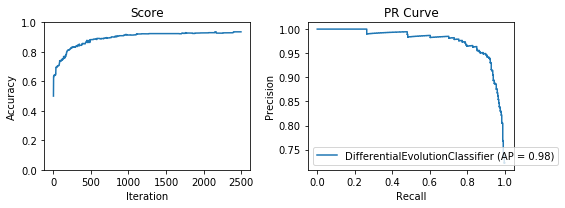

In [14]:
plot_model(de_model, 2500, X_test, y_test)